# Load data

In [1]:
! pip install pennylane
! pip install torch
! pip install torch_geometric
! pip install tensorflow
! pip install torchsummary


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 103.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as pnp
import jax
from jax import numpy as jnp
import optax
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


In [3]:
df_train = pd.read_csv('/kaggle/input/housing/train.csv')
df_val = pd.read_csv('/kaggle/input/housing/val.csv')
df_test = pd.read_csv('/kaggle/input/housing/test.csv')

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
features_numerical = df_train.select_dtypes(exclude=['object', 'bool']).copy()
numerical_cols = features_numerical.columns.tolist()

numerical_cols.remove('price')

features_categorical = df_train.select_dtypes(include=['object', 'bool']).copy()
categorical_cols = features_categorical.columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='passthrough'
)

y_train = df_train['price'].copy()
y_val = df_val['price'].copy()

df_train = df_train.drop(['price'], axis = 1)
df_val = df_val.drop(['price'], axis = 1)

y_train.to_numpy()
y_val.to_numpy()

X_train = preprocessor.fit_transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)


# Quantum

In [ ]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as pnp
import jax
from jax import numpy as jnp
import optax
import torch
import torch.nn as nn
import pennylane as qml
import random


In [7]:
import os
#from Uwb_dataset import import_from_files
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Bidirectional
import tensorflow as tf
# Loads and Processes the data that will be used in QCNN and Hierarchical Classifier Training
import numpy as np
#import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np
import autograd.numpy as anp
from pennylane.templates.embeddings import AmplitudeEmbedding, AngleEmbedding
from pennylane.templates.state_preparations import MottonenStatePreparation
from pennylane.templates import RandomLayers
from sklearn.preprocessing import normalize
import torch
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

2025-05-25 13:27:58.018706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748179678.226438      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748179678.287707      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'cuda'

In [8]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))

X_train_torch = torch.tensor(X_train, dtype = torch.float32).to(device)
X_val_torch = torch.tensor(X_val, dtype = torch.float32).to(device)
X_test_torch = torch.tensor(X_test, dtype = torch.float32).to(device)
y_train_torch = torch.tensor(y_train_scaled, dtype = torch.float32).to(device)
y_val_torch = torch.tensor(y_val_scaled, dtype = torch.float32).to(device)

In [9]:
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(69)

In [ ]:
# import pennylane as qml

# def U_4(params, wires): # 3 params 2 qubit
#     qml.RZ(-np.pi / 2, wires = wires[1])
#     qml.CNOT(wires = [wires[1], wires[0]]) # (source, target)
#     qml.RZ(params[0], wires = wires[0])
#     qml.RY(params[1], wires = wires[1])
#     qml.CNOT(wires = [wires[0], wires[1]])
#     qml.RZ(params[2], wires = wires[1])
#     qml.CNOT(wires = [wires[1], wires[0]])
#     qml.RZ(np.pi / 2, wires = wires[0])
    
# def conv_layer1(U, params, Uname): 
#     if Uname == 'U_4': # parameter 3
#         U(params[0:3], wires=[0, 1])
#         U(params[3:6], wires=[2, 3])
#         U(params[6:9], wires=[4, 5])
#         U(params[9:12], wires=[6, 7])
#         U(params[12:15], wires=[8, 9])
        
#         U(params[15:18], wires=[1, 2])
#         U(params[18:21], wires=[3, 4])
#         U(params[21:24], wires=[5, 6])
#         U(params[24:27], wires=[7, 8])
#         U(params[27:30], wires=[9, 0])
        
# def U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires): # 15 params, Convolutional Circuit 10
#     qml.U3(*weights_0, wires=wires[0])
#     qml.U3(*weights_1, wires=wires[1])
#     qml.CNOT(wires=[wires[0], wires[1]])
#     qml.RY(weights_2, wires=wires[0])
#     qml.RZ(weights_3, wires=wires[1])
#     qml.CNOT(wires=[wires[1], wires[0]])
#     qml.RY(weights_4, wires=wires[0])
#     qml.CNOT(wires=[wires[0], wires[1]])
#     qml.U3(*weights_5, wires=wires[0])
#     qml.U3(*weights_6, wires=wires[1])
    
# # Unitary Ansatz for Pooling Layer
# def Pooling_ansatz1(weights_0, weights_1, wires): #2 params
#     qml.CRZ(weights_0, wires=[wires[0], wires[1]])
#     qml.PauliX(wires=wires[0])
#     qml.CRX(weights_1, wires=[wires[0], wires[1]])
    
    
# n_qubits = 10
# dev = qml.device("default.qubit", wires=n_qubits)
# @qml.qnode(dev, interface = "torch")
# def qnode(inputs, weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, weights_7, weights_8): # , weights_9, weights_10, weights_11, weights_12, weights_13, weights_14, weights_15, weights_16, weights_17
#     qml.AngleEmbedding(inputs, wires=range(n_qubits))
#     #qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), normalize=True)
#     #qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
   
#     # QCNN
#     #--------------------------------------------------------- Convolutional Layer1 ---------------------------------------------------------#    
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[0, 1])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[2, 3])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[4, 5])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[6, 7])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[8, 9])
    
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[1, 2])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[3, 4])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[5, 6])
#     # U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[7, 0])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[7, 8])
#     U_SU4(weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, wires=[9, 0])

#     #--------------------------------------------------------- Pooling Layer1 ---------------------------------------------------------#
#     ## Pooling Circuit  Block 2 weights_7, weights_8
#     Pooling_ansatz1(weights_7, weights_8, wires=[0,1])
#     Pooling_ansatz1(weights_7, weights_8, wires=[2,3])
#     Pooling_ansatz1(weights_7, weights_8, wires=[4,5])
#     Pooling_ansatz1(weights_7, weights_8, wires=[6,7])
#     Pooling_ansatz1(weights_7, weights_8, wires=[8,9])

#     result = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
#     return result

In [ ]:
# weight_shapes = {
#     "weights_0": 3,
#     "weights_1": 3,
#     "weights_2": 1,
#     "weights_3": 1,
#     "weights_4": 1,
#     "weights_5": 3,
#     "weights_6": 3,
#     "weights_7": 1,
#     "weights_8": 1,    
# }

# qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

In [10]:
n_qubits = 10
dev = qml.device("default.qubit", wires = n_qubits)

@qml.qnode(dev, interface = "torch")
def quantum_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires = range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires = range(n_qubits))
    # qml.StronglyEntanglingLayers(weights, wires = range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


@qml.qnode(dev, interface = "torch")
def quantum_circuit_iqp(inputs, weights):
    qml.IQPEmbedding(inputs, wires=range(n_qubits), n_repeats=1)
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (6, n_qubits)}

@qml.qnode(dev, interface = "torch")
def amplitude_circuit(inputs, weights):
    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), normalize=True)
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(w)) for w in range(n_qubits)]


amplitude_weight = {"weights": (1,n_qubits, 3)}
n_layers = 6
@qml.qnode(dev, interface = "torch")
def qnn_circuit(inputs, weights):
    # encode inputs from previous layer
    # as rotations.
    for i in range(n_qubits):
        qml.RX(inputs[i], wires=i)
    # place gates using the trainable weights
    # as parameters.
    for layer_index in range(n_layers):
        # place the trainable rotations
        for i in range(n_qubits):
            qml.RY(weights[i + layer_index * n_qubits], wires=i)
        # place the entangling gates
        for i in range(n_qubits):
            j = (i + 1) % n_qubits
            qml.CNOT(wires=(i, j))
    # now, return the pauli Z expectation values
    # on each qubit.
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


ampli_layer = qml.qnn.TorchLayer(amplitude_circuit, amplitude_weight)
base_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)
# qnn_layer = qml.qnn.TorchLayer(qnn_circuit, weight_shapes)


In [15]:
class HybridQNN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, num_layers = 3):
        super().__init__()
        self.num_layers = num_layers
        self.qnn_weights = torch.rand(self.num_layers * n_qubits) * np.pi

        self.reduction_layer = nn.Linear(in_dim, hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim, 12)

        self.output_layer = nn.Linear(hidden_dim, out_dim)

    def forward(self, x):
        x = x.to(device)
        x = self.reduction_layer(x)
        x = base_layer(x) # for quantum
        #x = self.hidden_layer(x) # for non quantum
        x = self.output_layer(x)
        # just return outputs since we will use cross entropy loss in
        # training
        return x

model = HybridQNN(in_dim = X_train_torch.shape[1], hidden_dim = n_qubits, out_dim = 1).to(device)

In [16]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

In [17]:
model.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=1)


In [18]:
from torchsummary import summary as summary

summary(model, (27,)) # (model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             280
            Linear-2                    [-1, 1]              11
Total params: 291
Trainable params: 291
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [19]:
from torch.utils.data import DataLoader, TensorDataset

# Bước 1: Gộp dữ liệu thành dataset
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)

# Bước 2: Tạo DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [20]:
from tqdm import tqdm
epochs = 500
train_losses = []
val_losses = []
best_val_loss = float('inf')

count = 0

for epoch in tqdm(range(epochs)):
    model.train()
    running_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(X_batch), y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * len(X_batch)

    avg_loss = running_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)
    # print(f"Epoch {epoch}: Train loss = {avg_loss:.4f}")

    # Validation
    model.eval()
    val_running_loss = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_output = model(X_val_batch)
            val_loss = criterion(val_output, y_val_batch)
            val_running_loss += val_loss.item() * len(X_val_batch)

    avg_val_loss = val_running_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    # print(f"Epoch {epoch}: Val loss = {avg_val_loss:.4f}")

    # Learning rate scheduler
    scheduler.step()
    # print(f"Learning rate after epoch {epoch+1}: {scheduler.get_last_lr()[0]}")

    # Save checkpoint if best
    if avg_val_loss < best_val_loss:
        count = 0
        best_val_loss = avg_val_loss
        best_model = model.state_dict()
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'val_loss': avg_val_loss,
            'train_losses': train_losses,
            'val_losses': val_losses
        }
        torch.save(checkpoint, 'checkpoint_best_model.pth')
        print(f"Checkpoint saved at epoch {epoch} with val_loss {avg_val_loss:.4f}")
    else: 
        count += 1
    if count > 50:
        break


  0%|          | 1/500 [00:07<58:48,  7.07s/it]

Checkpoint saved at epoch 0 with val_loss 0.9208


  0%|          | 2/500 [00:13<56:37,  6.82s/it]

Checkpoint saved at epoch 1 with val_loss 0.9031


  1%|          | 3/500 [00:20<55:58,  6.76s/it]

Checkpoint saved at epoch 2 with val_loss 0.8859


  1%|          | 4/500 [00:27<55:42,  6.74s/it]

Checkpoint saved at epoch 3 with val_loss 0.8690


  1%|          | 5/500 [00:33<55:33,  6.74s/it]

Checkpoint saved at epoch 4 with val_loss 0.8531


  1%|          | 6/500 [00:40<55:12,  6.70s/it]

Checkpoint saved at epoch 5 with val_loss 0.8377


  1%|▏         | 7/500 [00:47<55:00,  6.69s/it]

Checkpoint saved at epoch 6 with val_loss 0.8225


  2%|▏         | 8/500 [00:53<54:48,  6.68s/it]

Checkpoint saved at epoch 7 with val_loss 0.8076


  2%|▏         | 9/500 [01:00<54:44,  6.69s/it]

Checkpoint saved at epoch 8 with val_loss 0.7928


  2%|▏         | 10/500 [01:07<55:35,  6.81s/it]

Checkpoint saved at epoch 9 with val_loss 0.7776


  2%|▏         | 11/500 [01:14<55:01,  6.75s/it]

Checkpoint saved at epoch 10 with val_loss 0.7615


  2%|▏         | 12/500 [01:20<54:52,  6.75s/it]

Checkpoint saved at epoch 11 with val_loss 0.7460


  3%|▎         | 13/500 [01:27<54:41,  6.74s/it]

Checkpoint saved at epoch 12 with val_loss 0.7293


  3%|▎         | 14/500 [01:34<54:26,  6.72s/it]

Checkpoint saved at epoch 13 with val_loss 0.7125


  3%|▎         | 15/500 [01:41<54:21,  6.73s/it]

Checkpoint saved at epoch 14 with val_loss 0.6954


  3%|▎         | 16/500 [01:47<54:18,  6.73s/it]

Checkpoint saved at epoch 15 with val_loss 0.6766


  3%|▎         | 17/500 [01:54<54:15,  6.74s/it]

Checkpoint saved at epoch 16 with val_loss 0.6604


  4%|▎         | 18/500 [02:01<54:10,  6.74s/it]

Checkpoint saved at epoch 17 with val_loss 0.6451


  4%|▍         | 19/500 [02:08<54:19,  6.78s/it]

Checkpoint saved at epoch 18 with val_loss 0.6304


  4%|▍         | 20/500 [02:15<54:20,  6.79s/it]

Checkpoint saved at epoch 19 with val_loss 0.6165


  4%|▍         | 21/500 [02:21<53:51,  6.75s/it]

Checkpoint saved at epoch 20 with val_loss 0.6047


  4%|▍         | 22/500 [02:28<53:35,  6.73s/it]

Checkpoint saved at epoch 21 with val_loss 0.5931


  5%|▍         | 23/500 [02:35<53:21,  6.71s/it]

Checkpoint saved at epoch 22 with val_loss 0.5818


  5%|▍         | 24/500 [02:41<53:22,  6.73s/it]

Checkpoint saved at epoch 23 with val_loss 0.5714


  5%|▌         | 25/500 [02:48<53:08,  6.71s/it]

Checkpoint saved at epoch 24 with val_loss 0.5614


  5%|▌         | 26/500 [02:55<52:54,  6.70s/it]

Checkpoint saved at epoch 25 with val_loss 0.5527


  5%|▌         | 27/500 [03:01<52:56,  6.72s/it]

Checkpoint saved at epoch 26 with val_loss 0.5440


  6%|▌         | 28/500 [03:08<52:52,  6.72s/it]

Checkpoint saved at epoch 27 with val_loss 0.5354


  6%|▌         | 29/500 [03:15<52:44,  6.72s/it]

Checkpoint saved at epoch 28 with val_loss 0.5271


  6%|▌         | 30/500 [03:22<52:34,  6.71s/it]

Checkpoint saved at epoch 29 with val_loss 0.5189


  6%|▌         | 31/500 [03:28<52:21,  6.70s/it]

Checkpoint saved at epoch 30 with val_loss 0.5121


  6%|▋         | 32/500 [03:35<52:06,  6.68s/it]

Checkpoint saved at epoch 31 with val_loss 0.5058


  7%|▋         | 33/500 [03:42<52:06,  6.70s/it]

Checkpoint saved at epoch 32 with val_loss 0.4991


  7%|▋         | 34/500 [03:48<51:57,  6.69s/it]

Checkpoint saved at epoch 33 with val_loss 0.4914


  7%|▋         | 35/500 [03:55<51:49,  6.69s/it]

Checkpoint saved at epoch 34 with val_loss 0.4856


  7%|▋         | 36/500 [04:02<51:40,  6.68s/it]

Checkpoint saved at epoch 35 with val_loss 0.4786


  7%|▋         | 37/500 [04:08<51:31,  6.68s/it]

Checkpoint saved at epoch 36 with val_loss 0.4743


  8%|▊         | 38/500 [04:15<51:26,  6.68s/it]

Checkpoint saved at epoch 37 with val_loss 0.4685


  8%|▊         | 39/500 [04:22<51:13,  6.67s/it]

Checkpoint saved at epoch 38 with val_loss 0.4617


  8%|▊         | 40/500 [04:28<51:05,  6.66s/it]

Checkpoint saved at epoch 39 with val_loss 0.4576


  8%|▊         | 41/500 [04:35<50:55,  6.66s/it]

Checkpoint saved at epoch 40 with val_loss 0.4520


  8%|▊         | 42/500 [04:42<50:55,  6.67s/it]

Checkpoint saved at epoch 41 with val_loss 0.4467


  9%|▊         | 43/500 [04:49<51:43,  6.79s/it]

Checkpoint saved at epoch 42 with val_loss 0.4423


  9%|▉         | 44/500 [04:55<51:20,  6.76s/it]

Checkpoint saved at epoch 43 with val_loss 0.4372


  9%|▉         | 45/500 [05:02<51:08,  6.74s/it]

Checkpoint saved at epoch 44 with val_loss 0.4328


  9%|▉         | 46/500 [05:09<50:51,  6.72s/it]

Checkpoint saved at epoch 45 with val_loss 0.4276


  9%|▉         | 47/500 [05:15<50:53,  6.74s/it]

Checkpoint saved at epoch 46 with val_loss 0.4236


 10%|▉         | 48/500 [05:22<50:34,  6.71s/it]

Checkpoint saved at epoch 47 with val_loss 0.4195


 10%|▉         | 49/500 [05:29<50:40,  6.74s/it]

Checkpoint saved at epoch 48 with val_loss 0.4155


 10%|█         | 50/500 [05:36<50:37,  6.75s/it]

Checkpoint saved at epoch 49 with val_loss 0.4119


 10%|█         | 51/500 [05:43<50:41,  6.77s/it]

Checkpoint saved at epoch 50 with val_loss 0.4080


 10%|█         | 52/500 [05:49<50:23,  6.75s/it]

Checkpoint saved at epoch 51 with val_loss 0.4038


 11%|█         | 53/500 [05:56<50:12,  6.74s/it]

Checkpoint saved at epoch 52 with val_loss 0.4003


 11%|█         | 54/500 [06:03<50:16,  6.76s/it]

Checkpoint saved at epoch 53 with val_loss 0.3963


 11%|█         | 55/500 [06:10<50:07,  6.76s/it]

Checkpoint saved at epoch 54 with val_loss 0.3927


 11%|█         | 56/500 [06:16<50:01,  6.76s/it]

Checkpoint saved at epoch 55 with val_loss 0.3894


 11%|█▏        | 57/500 [06:23<49:42,  6.73s/it]

Checkpoint saved at epoch 56 with val_loss 0.3862


 12%|█▏        | 58/500 [06:30<49:29,  6.72s/it]

Checkpoint saved at epoch 57 with val_loss 0.3842


 12%|█▏        | 59/500 [06:36<49:22,  6.72s/it]

Checkpoint saved at epoch 58 with val_loss 0.3802


 12%|█▏        | 60/500 [06:43<49:20,  6.73s/it]

Checkpoint saved at epoch 59 with val_loss 0.3769


 12%|█▏        | 61/500 [06:50<49:17,  6.74s/it]

Checkpoint saved at epoch 60 with val_loss 0.3740


 12%|█▏        | 62/500 [06:57<49:09,  6.73s/it]

Checkpoint saved at epoch 61 with val_loss 0.3708


 13%|█▎        | 63/500 [07:03<48:55,  6.72s/it]

Checkpoint saved at epoch 62 with val_loss 0.3688


 13%|█▎        | 64/500 [07:10<48:48,  6.72s/it]

Checkpoint saved at epoch 63 with val_loss 0.3661


 13%|█▎        | 65/500 [07:17<48:42,  6.72s/it]

Checkpoint saved at epoch 64 with val_loss 0.3624


 13%|█▎        | 66/500 [07:24<48:47,  6.74s/it]

Checkpoint saved at epoch 65 with val_loss 0.3605


 13%|█▎        | 67/500 [07:30<48:39,  6.74s/it]

Checkpoint saved at epoch 66 with val_loss 0.3577


 14%|█▎        | 68/500 [07:37<48:42,  6.77s/it]

Checkpoint saved at epoch 67 with val_loss 0.3553


 14%|█▍        | 69/500 [07:44<48:32,  6.76s/it]

Checkpoint saved at epoch 68 with val_loss 0.3539


 14%|█▍        | 70/500 [07:51<48:33,  6.78s/it]

Checkpoint saved at epoch 69 with val_loss 0.3511


 14%|█▍        | 71/500 [07:57<48:31,  6.79s/it]

Checkpoint saved at epoch 70 with val_loss 0.3486


 14%|█▍        | 72/500 [08:04<48:20,  6.78s/it]

Checkpoint saved at epoch 71 with val_loss 0.3460


 15%|█▍        | 73/500 [08:11<48:09,  6.77s/it]

Checkpoint saved at epoch 72 with val_loss 0.3436


 15%|█▍        | 74/500 [08:18<47:53,  6.75s/it]

Checkpoint saved at epoch 73 with val_loss 0.3424


 15%|█▌        | 75/500 [08:24<47:42,  6.74s/it]

Checkpoint saved at epoch 74 with val_loss 0.3395


 15%|█▌        | 76/500 [08:31<48:08,  6.81s/it]

Checkpoint saved at epoch 75 with val_loss 0.3378


 15%|█▌        | 77/500 [08:38<47:45,  6.77s/it]

Checkpoint saved at epoch 76 with val_loss 0.3350


 16%|█▌        | 78/500 [08:45<47:23,  6.74s/it]

Checkpoint saved at epoch 77 with val_loss 0.3331


 16%|█▌        | 79/500 [08:51<47:07,  6.72s/it]

Checkpoint saved at epoch 78 with val_loss 0.3316


 16%|█▌        | 80/500 [08:58<47:01,  6.72s/it]

Checkpoint saved at epoch 79 with val_loss 0.3300


 16%|█▌        | 81/500 [09:05<46:44,  6.69s/it]

Checkpoint saved at epoch 80 with val_loss 0.3275


 16%|█▋        | 82/500 [09:11<46:37,  6.69s/it]

Checkpoint saved at epoch 81 with val_loss 0.3262


 17%|█▋        | 83/500 [09:18<46:30,  6.69s/it]

Checkpoint saved at epoch 82 with val_loss 0.3249


 17%|█▋        | 84/500 [09:25<46:21,  6.69s/it]

Checkpoint saved at epoch 83 with val_loss 0.3220


 17%|█▋        | 85/500 [09:31<46:20,  6.70s/it]

Checkpoint saved at epoch 84 with val_loss 0.3206


 17%|█▋        | 86/500 [09:38<46:08,  6.69s/it]

Checkpoint saved at epoch 85 with val_loss 0.3191


 17%|█▋        | 87/500 [09:45<46:02,  6.69s/it]

Checkpoint saved at epoch 86 with val_loss 0.3178


 18%|█▊        | 88/500 [09:52<45:53,  6.68s/it]

Checkpoint saved at epoch 87 with val_loss 0.3156


 18%|█▊        | 89/500 [09:58<45:51,  6.69s/it]

Checkpoint saved at epoch 88 with val_loss 0.3138


 18%|█▊        | 90/500 [10:05<45:37,  6.68s/it]

Checkpoint saved at epoch 89 with val_loss 0.3125


 18%|█▊        | 91/500 [10:12<45:28,  6.67s/it]

Checkpoint saved at epoch 90 with val_loss 0.3113


 18%|█▊        | 92/500 [10:18<45:23,  6.68s/it]

Checkpoint saved at epoch 91 with val_loss 0.3103


 19%|█▊        | 93/500 [10:25<45:14,  6.67s/it]

Checkpoint saved at epoch 92 with val_loss 0.3085


 19%|█▉        | 94/500 [10:32<45:12,  6.68s/it]

Checkpoint saved at epoch 93 with val_loss 0.3067


 19%|█▉        | 95/500 [10:38<45:05,  6.68s/it]

Checkpoint saved at epoch 94 with val_loss 0.3054


 19%|█▉        | 96/500 [10:45<44:55,  6.67s/it]

Checkpoint saved at epoch 95 with val_loss 0.3045


 19%|█▉        | 97/500 [10:52<44:46,  6.67s/it]

Checkpoint saved at epoch 96 with val_loss 0.3028


 20%|█▉        | 98/500 [10:58<44:42,  6.67s/it]

Checkpoint saved at epoch 97 with val_loss 0.3020


 20%|█▉        | 99/500 [11:05<44:40,  6.68s/it]

Checkpoint saved at epoch 98 with val_loss 0.3004


 20%|██        | 100/500 [11:12<44:29,  6.67s/it]

Checkpoint saved at epoch 99 with val_loss 0.2992


 20%|██        | 101/500 [11:18<44:23,  6.67s/it]

Checkpoint saved at epoch 100 with val_loss 0.2975


 20%|██        | 102/500 [11:25<44:14,  6.67s/it]

Checkpoint saved at epoch 101 with val_loss 0.2967


 21%|██        | 103/500 [11:32<44:13,  6.68s/it]

Checkpoint saved at epoch 102 with val_loss 0.2956


 21%|██        | 104/500 [11:38<44:00,  6.67s/it]

Checkpoint saved at epoch 103 with val_loss 0.2944


 21%|██        | 105/500 [11:45<43:52,  6.66s/it]

Checkpoint saved at epoch 104 with val_loss 0.2931


 21%|██        | 106/500 [11:52<43:41,  6.65s/it]

Checkpoint saved at epoch 105 with val_loss 0.2927


 21%|██▏       | 107/500 [11:58<43:37,  6.66s/it]

Checkpoint saved at epoch 106 with val_loss 0.2916


 22%|██▏       | 108/500 [12:05<43:36,  6.68s/it]

Checkpoint saved at epoch 107 with val_loss 0.2902


 22%|██▏       | 110/500 [12:19<43:54,  6.75s/it]

Checkpoint saved at epoch 109 with val_loss 0.2889


 22%|██▏       | 111/500 [12:25<43:37,  6.73s/it]

Checkpoint saved at epoch 110 with val_loss 0.2871


 22%|██▏       | 112/500 [12:32<43:20,  6.70s/it]

Checkpoint saved at epoch 111 with val_loss 0.2860


 23%|██▎       | 113/500 [12:39<43:26,  6.74s/it]

Checkpoint saved at epoch 112 with val_loss 0.2850


 23%|██▎       | 114/500 [12:45<43:08,  6.71s/it]

Checkpoint saved at epoch 113 with val_loss 0.2839


 23%|██▎       | 115/500 [12:52<42:53,  6.69s/it]

Checkpoint saved at epoch 114 with val_loss 0.2829


 23%|██▎       | 117/500 [13:05<42:35,  6.67s/it]

Checkpoint saved at epoch 116 with val_loss 0.2824


 24%|██▎       | 118/500 [13:12<42:33,  6.68s/it]

Checkpoint saved at epoch 117 with val_loss 0.2804


 24%|██▍       | 119/500 [13:19<42:24,  6.68s/it]

Checkpoint saved at epoch 118 with val_loss 0.2799


 24%|██▍       | 120/500 [13:25<42:16,  6.67s/it]

Checkpoint saved at epoch 119 with val_loss 0.2797


 24%|██▍       | 121/500 [13:32<42:08,  6.67s/it]

Checkpoint saved at epoch 120 with val_loss 0.2794


 24%|██▍       | 122/500 [13:39<42:10,  6.70s/it]

Checkpoint saved at epoch 121 with val_loss 0.2777


 25%|██▍       | 123/500 [13:46<42:01,  6.69s/it]

Checkpoint saved at epoch 122 with val_loss 0.2772


 25%|██▌       | 125/500 [13:59<41:42,  6.67s/it]

Checkpoint saved at epoch 124 with val_loss 0.2760


 25%|██▌       | 126/500 [14:06<41:33,  6.67s/it]

Checkpoint saved at epoch 125 with val_loss 0.2755


 25%|██▌       | 127/500 [14:12<41:28,  6.67s/it]

Checkpoint saved at epoch 126 with val_loss 0.2748


 26%|██▌       | 128/500 [14:19<41:19,  6.67s/it]

Checkpoint saved at epoch 127 with val_loss 0.2739


 26%|██▌       | 129/500 [14:26<41:13,  6.67s/it]

Checkpoint saved at epoch 128 with val_loss 0.2722


 26%|██▌       | 130/500 [14:32<41:04,  6.66s/it]

Checkpoint saved at epoch 129 with val_loss 0.2717


 26%|██▌       | 131/500 [14:39<40:57,  6.66s/it]

Checkpoint saved at epoch 130 with val_loss 0.2710


 27%|██▋       | 133/500 [14:52<40:53,  6.68s/it]

Checkpoint saved at epoch 132 with val_loss 0.2691


 27%|██▋       | 135/500 [15:06<40:34,  6.67s/it]

Checkpoint saved at epoch 134 with val_loss 0.2682


 27%|██▋       | 136/500 [15:12<40:30,  6.68s/it]

Checkpoint saved at epoch 135 with val_loss 0.2681


 27%|██▋       | 137/500 [15:19<40:23,  6.68s/it]

Checkpoint saved at epoch 136 with val_loss 0.2680


 28%|██▊       | 138/500 [15:26<40:14,  6.67s/it]

Checkpoint saved at epoch 137 with val_loss 0.2679


 28%|██▊       | 139/500 [15:32<40:08,  6.67s/it]

Checkpoint saved at epoch 138 with val_loss 0.2672


 28%|██▊       | 140/500 [15:39<39:59,  6.67s/it]

Checkpoint saved at epoch 139 with val_loss 0.2656


 28%|██▊       | 141/500 [15:46<39:56,  6.68s/it]

Checkpoint saved at epoch 140 with val_loss 0.2653


 29%|██▊       | 143/500 [15:59<40:06,  6.74s/it]

Checkpoint saved at epoch 142 with val_loss 0.2642


 29%|██▉       | 144/500 [16:06<39:50,  6.71s/it]

Checkpoint saved at epoch 143 with val_loss 0.2640


 29%|██▉       | 145/500 [16:13<39:36,  6.69s/it]

Checkpoint saved at epoch 144 with val_loss 0.2632


 29%|██▉       | 146/500 [16:19<39:33,  6.70s/it]

Checkpoint saved at epoch 145 with val_loss 0.2625


 29%|██▉       | 147/500 [16:26<39:25,  6.70s/it]

Checkpoint saved at epoch 146 with val_loss 0.2618


 30%|██▉       | 148/500 [16:33<39:18,  6.70s/it]

Checkpoint saved at epoch 147 with val_loss 0.2612


 30%|██▉       | 149/500 [16:39<39:09,  6.69s/it]

Checkpoint saved at epoch 148 with val_loss 0.2609


 30%|███       | 150/500 [16:46<38:59,  6.68s/it]

Checkpoint saved at epoch 149 with val_loss 0.2605


 30%|███       | 151/500 [16:53<38:54,  6.69s/it]

Checkpoint saved at epoch 150 with val_loss 0.2594


 31%|███       | 153/500 [17:06<38:34,  6.67s/it]

Checkpoint saved at epoch 152 with val_loss 0.2590


 31%|███       | 154/500 [17:13<38:25,  6.66s/it]

Checkpoint saved at epoch 153 with val_loss 0.2579


 31%|███       | 155/500 [17:19<38:30,  6.70s/it]

Checkpoint saved at epoch 154 with val_loss 0.2578


 31%|███▏      | 157/500 [17:33<38:30,  6.74s/it]

Checkpoint saved at epoch 156 with val_loss 0.2574


 32%|███▏      | 158/500 [17:40<38:22,  6.73s/it]

Checkpoint saved at epoch 157 with val_loss 0.2563


 32%|███▏      | 160/500 [17:53<38:03,  6.72s/it]

Checkpoint saved at epoch 159 with val_loss 0.2555


 32%|███▏      | 162/500 [18:07<37:58,  6.74s/it]

Checkpoint saved at epoch 161 with val_loss 0.2540


 33%|███▎      | 164/500 [18:20<37:48,  6.75s/it]

Checkpoint saved at epoch 163 with val_loss 0.2536


 33%|███▎      | 166/500 [18:34<37:47,  6.79s/it]

Checkpoint saved at epoch 165 with val_loss 0.2530


 33%|███▎      | 167/500 [18:41<37:43,  6.80s/it]

Checkpoint saved at epoch 166 with val_loss 0.2525


 34%|███▎      | 168/500 [18:47<37:33,  6.79s/it]

Checkpoint saved at epoch 167 with val_loss 0.2517


 34%|███▍      | 171/500 [19:08<37:15,  6.79s/it]

Checkpoint saved at epoch 170 with val_loss 0.2509


 35%|███▍      | 174/500 [19:28<36:52,  6.79s/it]

Checkpoint saved at epoch 173 with val_loss 0.2503


 35%|███▌      | 175/500 [19:35<36:40,  6.77s/it]

Checkpoint saved at epoch 174 with val_loss 0.2494


 36%|███▌      | 179/500 [20:02<36:33,  6.83s/it]

Checkpoint saved at epoch 178 with val_loss 0.2481


 37%|███▋      | 183/500 [20:29<35:43,  6.76s/it]

Checkpoint saved at epoch 182 with val_loss 0.2478


 37%|███▋      | 184/500 [20:36<35:27,  6.73s/it]

Checkpoint saved at epoch 183 with val_loss 0.2477


 37%|███▋      | 185/500 [20:43<35:12,  6.70s/it]

Checkpoint saved at epoch 184 with val_loss 0.2467


 37%|███▋      | 186/500 [20:49<35:01,  6.69s/it]

Checkpoint saved at epoch 185 with val_loss 0.2464


 37%|███▋      | 187/500 [20:56<34:50,  6.68s/it]

Checkpoint saved at epoch 186 with val_loss 0.2464


 38%|███▊      | 188/500 [21:03<34:48,  6.69s/it]

Checkpoint saved at epoch 187 with val_loss 0.2451


 39%|███▉      | 196/500 [21:56<33:53,  6.69s/it]

Checkpoint saved at epoch 195 with val_loss 0.2448


 39%|███▉      | 197/500 [22:03<33:53,  6.71s/it]

Checkpoint saved at epoch 196 with val_loss 0.2434


 40%|████      | 201/500 [22:30<33:16,  6.68s/it]

Checkpoint saved at epoch 200 with val_loss 0.2428


 41%|████      | 204/500 [22:50<32:56,  6.68s/it]

Checkpoint saved at epoch 203 with val_loss 0.2427


 41%|████▏     | 207/500 [23:10<32:42,  6.70s/it]

Checkpoint saved at epoch 206 with val_loss 0.2412


 42%|████▏     | 211/500 [23:37<32:31,  6.75s/it]

Checkpoint saved at epoch 210 with val_loss 0.2407


 42%|████▏     | 212/500 [23:44<32:15,  6.72s/it]

Checkpoint saved at epoch 211 with val_loss 0.2404


 43%|████▎     | 213/500 [23:50<32:03,  6.70s/it]

Checkpoint saved at epoch 212 with val_loss 0.2403


 43%|████▎     | 215/500 [24:04<31:46,  6.69s/it]

Checkpoint saved at epoch 214 with val_loss 0.2398


 44%|████▍     | 220/500 [24:37<31:08,  6.67s/it]

Checkpoint saved at epoch 219 with val_loss 0.2385


 45%|████▌     | 225/500 [25:11<30:33,  6.67s/it]

Checkpoint saved at epoch 224 with val_loss 0.2382


 46%|████▌     | 231/500 [25:51<30:33,  6.82s/it]

Checkpoint saved at epoch 230 with val_loss 0.2372


 48%|████▊     | 238/500 [26:39<29:32,  6.77s/it]

Checkpoint saved at epoch 237 with val_loss 0.2369


 48%|████▊     | 240/500 [26:52<29:21,  6.77s/it]

Checkpoint saved at epoch 239 with val_loss 0.2361


 48%|████▊     | 241/500 [26:59<29:11,  6.76s/it]

Checkpoint saved at epoch 240 with val_loss 0.2358


 49%|████▉     | 246/500 [27:33<28:49,  6.81s/it]

Checkpoint saved at epoch 245 with val_loss 0.2351


 52%|█████▏    | 262/500 [29:20<26:20,  6.64s/it]

Checkpoint saved at epoch 261 with val_loss 0.2337


 55%|█████▍    | 273/500 [30:33<25:10,  6.65s/it]

Checkpoint saved at epoch 272 with val_loss 0.2334


 55%|█████▌    | 276/500 [30:54<25:02,  6.71s/it]

Checkpoint saved at epoch 275 with val_loss 0.2329


 56%|█████▌    | 278/500 [31:07<24:46,  6.70s/it]

Checkpoint saved at epoch 277 with val_loss 0.2328


 57%|█████▋    | 286/500 [32:00<23:51,  6.69s/it]

Checkpoint saved at epoch 285 with val_loss 0.2324


 57%|█████▋    | 287/500 [32:07<23:42,  6.68s/it]

Checkpoint saved at epoch 286 with val_loss 0.2316


 58%|█████▊    | 292/500 [32:40<23:10,  6.68s/it]

Checkpoint saved at epoch 291 with val_loss 0.2315


 60%|█████▉    | 299/500 [33:27<22:16,  6.65s/it]

Checkpoint saved at epoch 298 with val_loss 0.2313


 60%|██████    | 302/500 [33:47<22:02,  6.68s/it]

Checkpoint saved at epoch 301 with val_loss 0.2299


 61%|██████    | 305/500 [34:07<21:41,  6.68s/it]

Checkpoint saved at epoch 304 with val_loss 0.2298


 63%|██████▎   | 314/500 [35:07<20:41,  6.68s/it]

Checkpoint saved at epoch 313 with val_loss 0.2284


 66%|██████▌   | 330/500 [36:54<18:51,  6.65s/it]

Checkpoint saved at epoch 329 with val_loss 0.2283


 69%|██████▊   | 343/500 [38:20<17:36,  6.73s/it]

Checkpoint saved at epoch 342 with val_loss 0.2275


 71%|███████   | 354/500 [39:34<16:11,  6.65s/it]

Checkpoint saved at epoch 353 with val_loss 0.2269


 72%|███████▏  | 360/500 [40:13<15:28,  6.63s/it]

Checkpoint saved at epoch 359 with val_loss 0.2267


 77%|███████▋  | 385/500 [43:00<12:44,  6.65s/it]

Checkpoint saved at epoch 384 with val_loss 0.2264


 87%|████████▋ | 435/500 [48:40<07:16,  6.71s/it]


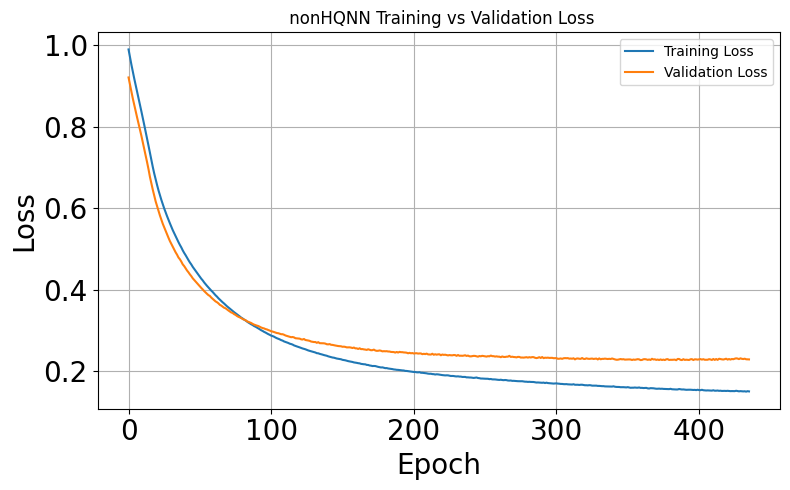

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.title(' nonHQNN Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
np.argmin(val_losses)

384

In [23]:
# model.load_state_dict(best_model)
checkpoint = torch.load('checkpoint_best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()
with torch.no_grad():
    y_test_pred_scaled = model(X_test_torch)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.cpu().detach().numpy())

In [24]:
dummy_inputs = torch.randn(1,n_qubits) # Một mẫu dữ liệu ngẫu nhiên để vẽ

# In ra mạch lượng tử bằng cách truyền dummy_inputs vào qlayer khi gọi qml.draw()
print(qml.draw(base_layer)(dummy_inputs))


0: ─╭AngleEmbedding(M0)─╭BasicEntanglerLayers(M1)─┤  <Z>
1: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
2: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
3: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
4: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
5: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
6: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
7: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
8: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
9: ─╰AngleEmbedding(M0)─╰BasicEntanglerLayers(M1)─┤  <Z>

M0 = 
tensor([[-0.8854,  0.1634,  0.2442, -0.8983, -1.3253,  1.0986,  1.2669,  0.4093,
          0.2546,  2.0403]])
M1 = 
tensor([[0.5939, 5.3563, 2.2446, 4.7074, 2.2490, 3.4259, 5.1342, 0.3584, 2.8650,
         0.1151],
        [3.6783, 4.1595, 0.0994, 3.3356, 5.6903, 3.7770, 3.8151, 3.2342, 4.8093,
         3.4146],
        [2.3711, 1.9202, 4.2545, 2.3886, 1.5241, 5.1949, 5.4929, 4.0005, 2.4182,
         0.2590],
        [5

In [25]:
y_test_pred[:10], y_test_pred_scaled[:10], y_val_torch[:10]

(array([[14.544715 ],
        [ 7.243299 ],
        [26.275558 ],
        [ 5.6828365],
        [10.5184555],
        [12.092861 ],
        [18.727865 ],
        [27.014576 ],
        [31.284946 ],
        [16.190514 ]], dtype=float32),
 tensor([[ 0.1019],
         [-0.6148],
         [ 1.2536],
         [-0.7680],
         [-0.2933],
         [-0.1388],
         [ 0.5126],
         [ 1.3261],
         [ 1.7453],
         [ 0.2635]], device='cuda:0'),
 tensor([[-1.0118],
         [-0.4473],
         [ 0.0681],
         [ 0.6375],
         [ 2.0610],
         [ 1.4719],
         [-1.0167],
         [-0.9332],
         [-0.4424],
         [ 0.8338]], device='cuda:0'))

In [26]:
mlp_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred.flatten()
})
mlp_submit.to_csv('quantum.csv', index=False)